In [1]:
%matplotlib inline

/Users/a-tanaka/Documents/Private/Ghq/my.github.com/ara-ta3/ml4se/env/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


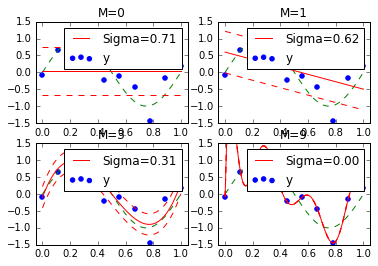

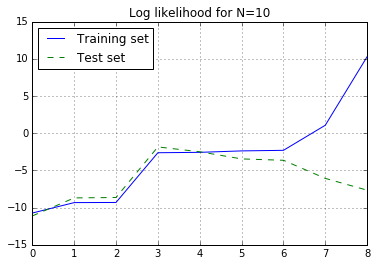

In [2]:
# -*- coding: utf-8 -*-
#
# 最尤推定による回帰分析
#
# 2015/05/19 ver1.0
#

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

from numpy.random import normal

#------------#
# Parameters #
#------------#
N=10            # サンプルを取得する位置 x の個数
M=[0,1,3,9]     # 多項式の次数


# データセット {x_n,y_n} (n=1...N) を用意
def create_dataset(num):
    dataset = DataFrame(columns=['x','y'])
    for i in range(num):
        x = float(i)/float(num-1)
        y = np.sin(2*np.pi*x) + normal(scale=0.3)
        dataset = dataset.append(Series([x,y], index=['x','y']),
                                 ignore_index=True)
    return dataset

# 最大対数尤度（Maximum log likelihood）を計算
def log_likelihood(dataset, f):
    dev = 0.0
    n = float(len(dataset))
    for index, line in dataset.iterrows():
        x, y = line.x, line.y
        dev += (y - f(x))**2
    err = dev * 0.5
    beta = n / dev
    lp = -beta*err + 0.5*n*np.log(0.5*beta/np.pi)
    return lp

# 最尤推定で解を求める（解法は最小二乗法と同じ）
def resolve(dataset, m):
    t = dataset.y
    phi = DataFrame()
    for i in range(0,m+1):
        p = dataset.x**i
        p.name="x**%d" % i
        phi = pd.concat([phi,p], axis=1)
    tmp = np.linalg.inv(np.dot(phi.T, phi))
    ws = np.dot(np.dot(tmp, phi.T), t)

    def f(x):
        y = 0.0
        for i, w in enumerate(ws):
            y += w * (x ** i)
        return y

    sigma2 = 0.0
    for index, line in dataset.iterrows():
        sigma2 += (f(line.x)-line.y)**2
    sigma2 /= len(dataset)

    return (f, ws, np.sqrt(sigma2))

# Main
def main():
    train_set = create_dataset(N)
    test_set = create_dataset(N)
    df_ws = DataFrame()

    # 多項式近似の曲線を求めて表示
    fig = plt.figure()
    for c, m in enumerate(M):
        f, ws, sigma = resolve(train_set, m)
        df_ws = df_ws.append(Series(ws,name="M=%d" % m))

        subplot = fig.add_subplot(2,2,c+1)
        subplot.set_xlim(-0.05,1.05)
        subplot.set_ylim(-1.5,1.5)
        subplot.set_title("M=%d" % m)

        # トレーニングセットを表示
        subplot.scatter(train_set.x, train_set.y, marker='o', color='blue')

        # 真の曲線を表示
        linex = np.linspace(0,1,101)
        liney = np.sin(2*np.pi*linex)
        subplot.plot(linex, liney, color='green', linestyle='--')

        # 多項式近似の曲線を表示
        linex = np.linspace(0,1,101)
        liney = f(linex)
        label = "Sigma=%.2f" % sigma
        subplot.plot(linex, liney, color='red', label=label)
        subplot.plot(linex, liney+sigma, color='red', linestyle='--')
        subplot.plot(linex, liney-sigma, color='red', linestyle='--')
        subplot.legend(loc=1)

    fig.show()

    # 多項式近似に対する最大対数尤度を計算
    df = DataFrame()
    train_mlh = []
    test_mlh = []
    for m in range(0,9): # 多項式の次数
        f, ws, sigma = resolve(train_set, m)
        train_mlh.append(log_likelihood(train_set, f))
        test_mlh.append(log_likelihood(test_set, f))
    df = pd.concat([df,
                    DataFrame(train_mlh, columns=['Training set']),
                    DataFrame(test_mlh, columns=['Test set'])],
                    axis=1)
    df.plot(title='Log likelihood for N=%d' % N, grid=True, style=['-','--'])
    plt.show()

    
    
if __name__ == '__main__':
    main()

In [3]:
N = 100

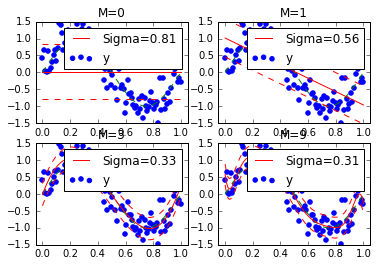

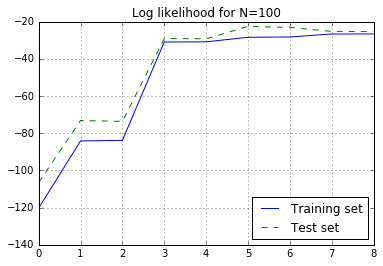

In [4]:
main()

In [5]:
M = [3,10,20,50]

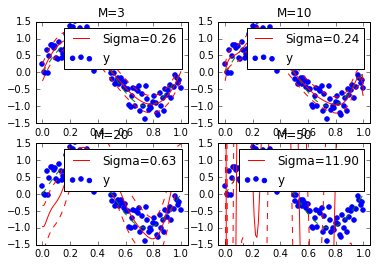

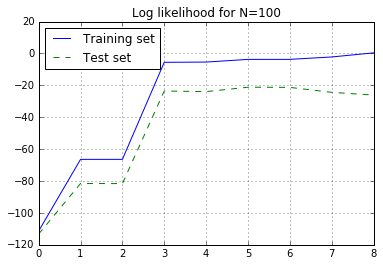

In [6]:
main()

In [11]:
def create_dataset(num):
    dataset = DataFrame(columns=['x','y'])
    for i in range(num):
        x = float(i)/float(num-1)
        y = np.sin(2*np.pi*x) + normal(scale=0.3)
        dataset = dataset.append(Series([x,y], index=['x','y']),
                                 ignore_index=True)
    return dataset


In [17]:
def create_dataset(num):
    dataset = DataFrame(columns=['x','y'])
    for i in range(num):
        x = float(i)/float(num-1)
        y = 0 + normal(scale=0.3)
        dataset = dataset.append(Series([x,y], index=['x','y']),
                                 ignore_index=True)
    return dataset


main()

In [10]:
main()

LinAlgError: Singular matrix

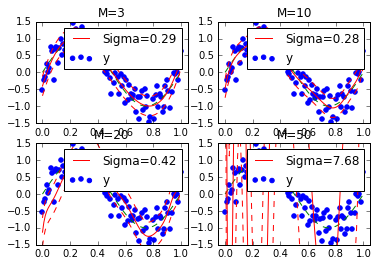

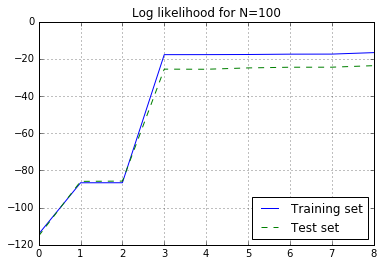

In [12]:
main()

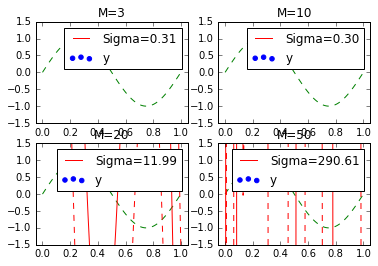

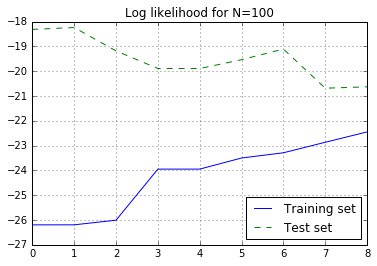

In [14]:
main()

In [15]:
M = [0,1,2,3]

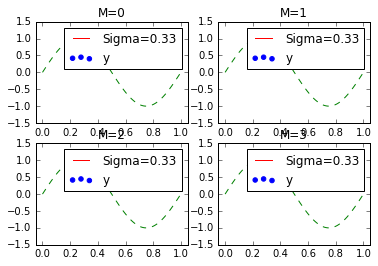

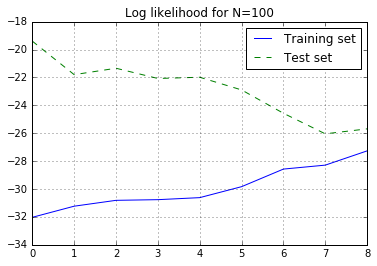

In [16]:
main()

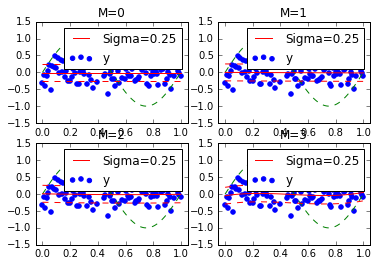

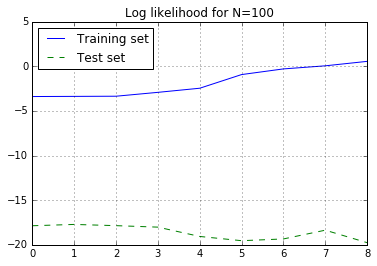

In [18]:
main()

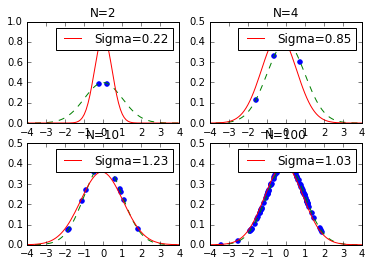

In [20]:
# -*- coding: utf-8 -*-
#
# 最尤推定による正規分布の推定
#
# 2015/04/23 ver1.0
#

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

from numpy.random import normal
from scipy.stats import norm

def gauss():
    fig = plt.figure()
    for c, datapoints in enumerate([2,4,10,100]): # サンプル数
        ds = normal(loc=0, scale=1, size=datapoints)
        mu = np.mean(ds)                # 平均の推定値
        sigma = np.sqrt(np.var(ds))     # 標準偏差の推定値

        subplot = fig.add_subplot(2,2,c+1)
        subplot.set_title("N=%d" % datapoints)
        # 真の曲線を表示
        linex = np.arange(-10,10.1,0.1)
        orig = norm(loc=0, scale=1)
        subplot.plot(linex, orig.pdf(linex), color='green', linestyle='--')
        # 推定した曲線を表示
        est = norm(loc=mu, scale=np.sqrt(sigma))
        label = "Sigma=%.2f" % sigma
        subplot.plot(linex, est.pdf(linex), color='red', label=label)
        subplot.legend(loc=1)
        # サンプルの表示
        subplot.scatter(ds, orig.pdf(ds), marker='o', color='blue')
        subplot.set_xlim(-4,4)
        subplot.set_ylim(0)
    fig.show()

if __name__ == '__main__':
    gauss()


* 標準偏差の推定値は実際より小さくなるらしい
* けど、↑ではなってないｗ

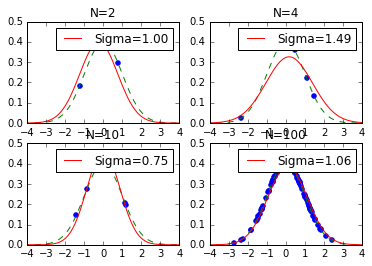

In [21]:
gauss()

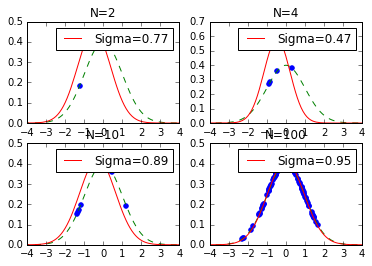

In [22]:
gauss()

* 標準偏差が小さくなるのは裾野のデータの発生確率が低いため

### 推定量

* 何らかの理屈にもとづいて推定値を計算する方法が得られた時に、その計算方法を推定量と呼ぶらしい
  * 方法なのに量？
* 一致性と不偏性を持つのが良い推定量
* 一致性
  * データを大きくしていった時に真の値に近づいていくこと
  * 一致性を持つ推定量を一致推定量というらしい
* 不偏性
  * 何回か取得した推定値の平均が真の値に近づいていくこと

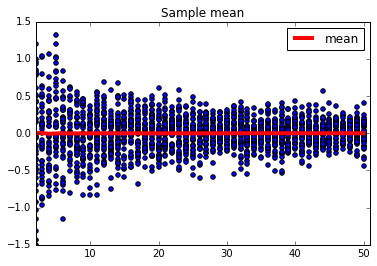

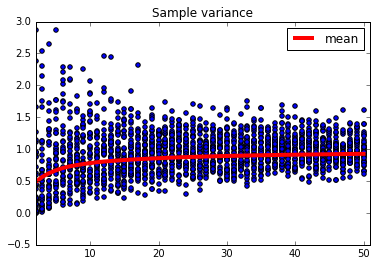

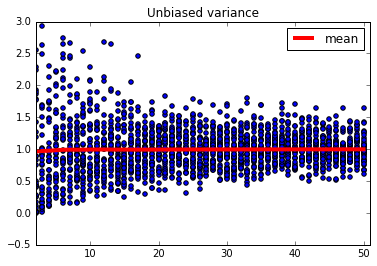

In [23]:
# -*- coding: utf-8 -*-
#
# 推定量の一致性と不偏性の確認
#
# 2015/06/01 ver1.0
#

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import normal

def draw_subplot(subplot, linex1, liney1, linex2, liney2, ylim):
    subplot.set_ylim(ylim)
    subplot.set_xlim(min(linex1), max(linex1)+1)
    subplot.scatter(linex1, liney1)
    subplot.plot(linex2, liney2, color='red', linewidth=4, label="mean")
    subplot.legend(loc=0)

def bias():
    mean_linex = []
    mean_mu = []
    mean_s2 = []
    mean_u2 = []
    raw_linex = []
    raw_mu = []
    raw_s2 = []
    raw_u2 = []
    for n in np.arange(2,51): # 観測データ数Nを変化させて実行
        for c in range(2000): # 特定のNについて2000回の推定を繰り返す
            ds = normal(loc=0, scale=1, size=n)
            raw_mu.append(np.mean(ds))
            raw_s2.append(np.var(ds))
            raw_u2.append(np.var(ds)*n/(n-1))
            raw_linex.append(n)
        mean_mu.append(np.mean(raw_mu)) # 標本平均の平均
        mean_s2.append(np.mean(raw_s2)) # 標本分散の平均
        mean_u2.append(np.mean(raw_u2)) # 不偏分散の平均
        mean_linex.append(n)

    # プロットデータを40個に間引きする
    raw_linex = raw_linex[0:-1:50]
    raw_mu = raw_mu[0:-1:50]
    raw_s2 = raw_s2[0:-1:50]
    raw_u2 = raw_u2[0:-1:50]

    # 標本平均の結果表示
    fig1 = plt.figure()
    subplot = fig1.add_subplot(1,1,1)
    subplot.set_title('Sample mean')
    draw_subplot(subplot, raw_linex, raw_mu, mean_linex, mean_mu, (-1.5,1.5))

    # 標本分散の結果表示
    fig2 = plt.figure()
    subplot = fig2.add_subplot(1,1,1)
    subplot.set_title('Sample variance')
    draw_subplot(subplot, raw_linex, raw_s2, mean_linex, mean_s2, (-0.5,3.0))

    # 不偏分散の結果表示
    fig3 = plt.figure()
    subplot = fig3.add_subplot(1,1,1)
    subplot.set_title('Unbiased variance')
    draw_subplot(subplot, raw_linex, raw_u2, mean_linex, mean_u2, (-0.5,3.0))

    fig1.show()
    fig2.show()
    fig3.show()
 
if __name__ == '__main__':
    bias()
    